In [1]:
import pandas as pd
import numpy as np

In [2]:
import joblib

In [3]:
df = joblib.load("ghz+sep.job")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,entangled
0,0.113325,0.043924,0.013853,-0.101828,0.306383,-0.055935,-0.106208,-0.240972,0.117857,0.220008,0.157771,-0.140158,0.552257,0.322585,0.156763,-0.517559,0.0
1,1.184758,0.184784,0.184784,0.109123,0.252158,0.148910,0.148910,0.087938,0.209068,0.123463,0.123463,0.072910,0.168479,0.099494,0.099494,0.058755,1.0
2,0.477289,0.015307,0.015307,0.028522,0.133023,0.247864,0.247864,0.461847,0.000336,0.000627,0.000627,0.001168,0.005447,0.010150,0.010150,0.018913,1.0
3,1.133226,0.059274,0.059274,0.018779,0.201729,0.063911,0.063911,0.020248,0.149464,0.047353,0.047353,0.015002,0.161158,0.051058,0.051058,0.016176,1.0
4,1.339046,0.090978,0.090978,0.029427,0.405802,0.131255,0.131255,0.042454,0.069769,0.022567,0.022567,0.007299,0.100657,0.032557,0.032557,0.010530,1.0


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,entangled
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.367340,0.023727,0.016705,0.031609,0.041320,0.020582,0.012744,0.035428,0.033313,0.020369,0.028359,0.035605,0.036786,0.022755,0.022591,0.038971,0.500000
std,0.493159,0.179637,0.183212,0.195012,0.199495,0.179376,0.189815,0.187877,0.204328,0.178790,0.191608,0.193126,0.199939,0.178380,0.188053,0.194959,0.500125
min,-0.802584,-0.730748,-0.719972,-0.728725,-0.772985,-0.706122,-0.716751,-0.712440,-0.774393,-0.900565,-0.727069,-0.783707,-0.680164,-0.640067,-0.757366,-0.849074,0.000000
25%,-0.012141,-0.001618,-0.014076,-0.008794,-0.005187,-0.018054,-0.023258,-0.005834,-0.005354,-0.005551,0.000147,-0.009528,0.000002,0.000008,-0.012607,-0.000034,0.000000
50%,0.260877,0.021035,0.018338,0.021876,0.025814,0.019645,0.017790,0.021458,0.023547,0.020330,0.023377,0.019737,0.026794,0.022814,0.022049,0.023872,0.500000
75%,0.813861,0.095146,0.093545,0.125921,0.131980,0.096238,0.093712,0.122515,0.124758,0.094593,0.108057,0.123935,0.130501,0.097526,0.099061,0.130668,1.000000
max,1.893274,0.844038,0.904768,0.788957,0.734901,0.673381,0.781083,0.823792,0.822416,0.656602,0.839480,0.743244,0.743952,0.840047,0.807889,0.729506,1.000000


## Random Forest 
### Raw data

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier(random_state=1)

X = df.drop(columns="entangled")
y = df['entangled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)


1.0

In [6]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
scores

array([1.    , 1.    , 1.    , 0.9975, 1.    ])

<AxesSubplot:>

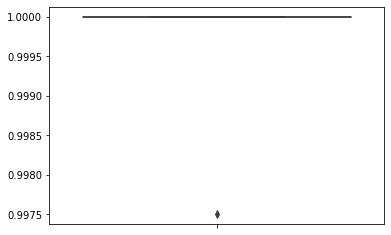

In [7]:
import seaborn as sns
sns.boxplot(y = scores)

### Dimensionality reduction

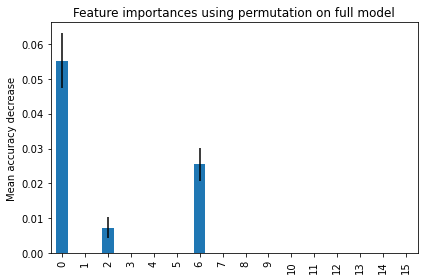

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


forest_importances = pd.Series(result.importances_mean)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [9]:
most_important = forest_importances.sort_values(ascending=False)[0:4].index
reduced_df = df[most_important]

In [10]:
reduced_df

,0,6,2,1
0,0.113325,-0.106208,0.013853,0.043924
1,1.184758,0.148910,0.184784,0.184784
2,0.477289,0.247864,0.015307,0.015307
3,1.133226,0.063911,0.059274,0.059274
4,1.339046,0.131255,0.090978,0.090978
...,...,...,...,...
1995,1.032156,0.004781,0.006013,0.006013
1996,0.510188,0.039641,0.047905,0.047905
1997,0.495134,0.088354,0.038120,0.038120
1998,0.021199,-0.346748,0.227296,0.386317


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier(random_state=1)

X = reduced_df
y = df['entangled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [12]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.9975

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.995 , 0.995 , 1.    , 0.995 , 0.9975])

<AxesSubplot:>

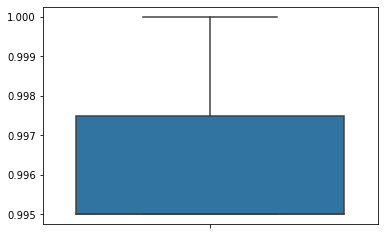

In [14]:
import seaborn as sns
sns.boxplot(y = scores)